# Exercise3 MINIST CLASSIFICATION USING CONV2D

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,Input,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import os 
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='True'
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [3]:
# data pre-processing
X_train = np.expand_dims(X_train,axis=-1) / 255.   # normalize
X_test = np.expand_dims(X_test,axis=-1)/ 255.      # normalize

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(X_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [4]:
# model-sequential
model = Sequential()
input_size=(28,28)
# model.add(Input(shape=input_size))
model.add(BatchNormalization(input_shape=(28,28,1)))

model.add(Conv2D(64,(5,5),padding='same',data_format='channels_last')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(32,(3,3),padding='same',data_format='channels_last')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(16,(3,3),padding='same',data_format='channels_last')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
__________

In [5]:
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True,batch_size=256,validation_data=(X_test,y_test))

Training ------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.6435 - acc: 0.8160 - val_loss: 0.1481 - val_acc: 0.9599
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1470 - acc: 0.9594 - val_loss: 0.0754 - val_acc: 0.9783
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0979 - acc: 0.9717 - val_loss: 0.0590 - val_acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0772 - acc: 0.9772 - val_loss: 0.0530 - val_acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0631 - acc: 0.9814 - val_loss: 0.0442 - val_acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0543 - acc: 0.9842 - val_loss: 0.0420 - val_acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0489 - acc: 0.984

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 7


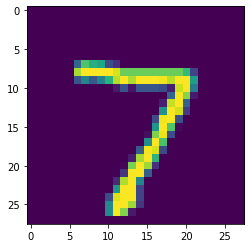

In [9]:
# test the model 
testdata=X_test[:100]
# get the probability value
pred=model.predict(testdata,batch_size=20)
# get the classification value
pred_c=np.argmax(pred,axis=1)
# pred_c=model.predict_classes(testdata,batch_size=20)
print(pred.shape)
reshapedata=testdata.reshape(100,28,28)
plt.imshow(reshapedata[0,:,:])
print(np.round(pred[:1]*100),pred_c[0])

* setp5保存模型

In [8]:
model.save('./mnist.h5')